     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
  label                                               Text  label_enc
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro

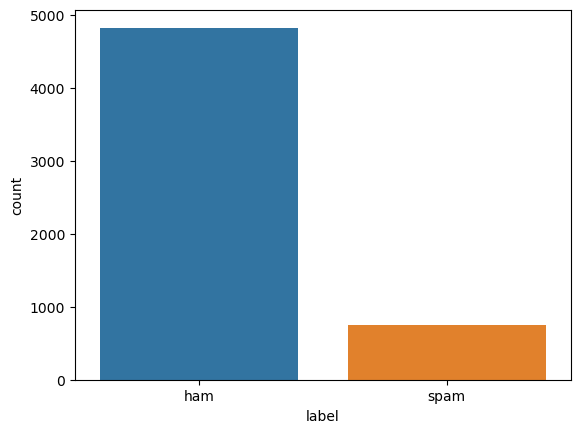

15
15585
(1195,) (1195,) (299,) (299,)
0.9698996655518395
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       145
           1       0.98      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Epoch 1/10
30/30 [==============================] - 1s 23ms/step - loss: 0.6562 - accuracy: 0.8180 - val_loss: 0.5792 - val_accuracy: 0.9331
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.9759 - val_loss: 0.2954 - val_accuracy: 0.9582
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9864 - val_loss: 0.1570 - val_accuracy: 0.9623
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9937 - val_loss: 0.1277 - val_accuracy: 0.9665
Epoch 5/10
30/30 [==============================] - 0s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import time

# Reading the data
df = pd.read_csv(r'C:\Users\Win10\Downloads\Kaggle Dataset\spam.csv', encoding='latin1')
print(df.head())

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

sns.countplot(x=df['label'])
plt.show()

# Find average number of tokens in all sentences
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length = len(s)
print(total_words_length)

# Splitting data for Training and testing
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})

# Performing undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(new_df['Text'].values.reshape(-1, 1), new_df['label'].values)

X_train, X_test, y_train_resampled, y_test = train_test_split(
    X_resampled.flatten(), y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, y_train_resampled.shape, X_test.shape, y_test.shape)

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec, y_train_resampled)

nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

# Building the model using TensorFlow

# Convert labels to categorical
y_train_resampled_cat = keras.utils.to_categorical(y_train_resampled)

# Measure time complexity
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert input data to dense arrays
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

# Train the model
history = model.fit(X_train_vec, y_train_resampled_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
y_test_cat = keras.utils.to_categorical(y_test)
accuracy = model.evaluate(X_test_vec, y_test_cat)[1]
print('Test Accuracy:', accuracy)


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
  label                                               Text  label_enc
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro

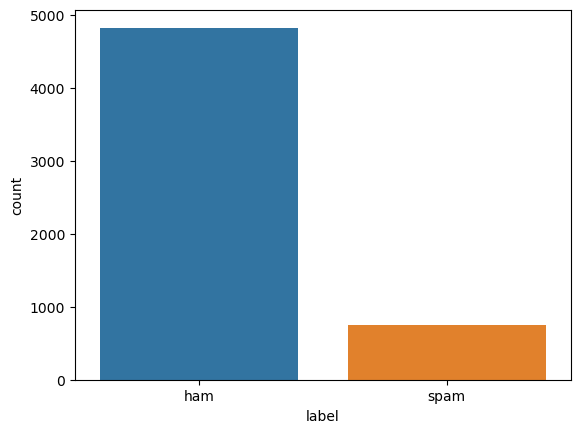

15
15585
(1195,) (1195,) (299,) (299,)
0.9698996655518395
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       145
           1       0.98      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Epoch 1/10
30/30 [==============================] - 1s 15ms/step - loss: 0.6600 - accuracy: 0.7626 - val_loss: 0.5910 - val_accuracy: 0.8996
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.9634 - val_loss: 0.2925 - val_accuracy: 0.9456
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9843 - val_loss: 0.1494 - val_accuracy: 0.9540
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9958 - val_loss: 0.1228 - val_accuracy: 0.9582
Epoch 5/10
30/30 [==============================] - 0s

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import time

# Reading the data
df = pd.read_csv(r'C:\Users\Win10\Downloads\Kaggle Dataset\spam.csv', encoding='latin1')
print(df.head())

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

sns.countplot(x=df['label'])
plt.show()

# Find average number of tokens in all sentences
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length = len(s)
print(total_words_length)

# Splitting data for Training and testing
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})

# Performing undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(new_df['Text'].values.reshape(-1, 1), new_df['label'].values)

X_train, X_test, y_train_resampled, y_test = train_test_split(
    X_resampled.flatten(), y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, y_train_resampled.shape, X_test.shape, y_test.shape)

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec, y_train_resampled)

nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

# Building the model using TensorFlow


# Convert labels to categorical
y_train_resampled_cat = keras.utils.to_categorical(y_train_resampled)

# Measure time complexity
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert input data to dense arrays
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

# Train the model
history = model.fit(X_train_vec, y_train_resampled_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
y_test_cat = keras.utils.to_categorical(y_test)
accuracy = model.evaluate(X_test_vec, y_test_cat)[1]
print('Test Accuracy:', accuracy)

# Measure the end time complexity
end_time = time.time()
execution_time = end_time - start_time

# Print the execution time
print('Execution Time:', execution_time)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
  label                                               Text  label_enc
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro

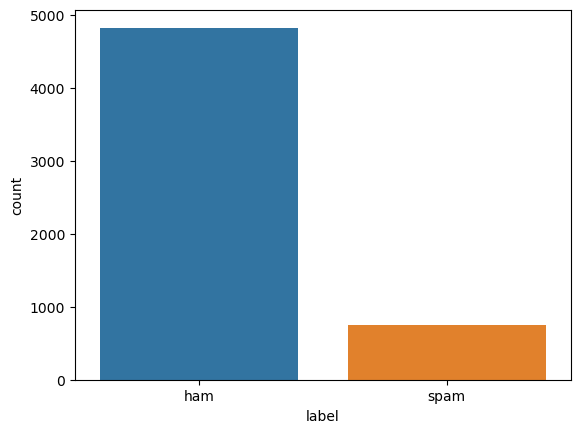

15
15585
(1195,) (1195,) (299,) (299,)
0.9698996655518395
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       145
           1       0.98      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Epoch 1/10
30/30 [==============================] - 1s 12ms/step - loss: 0.6547 - accuracy: 0.7678 - val_loss: 0.5708 - val_accuracy: 0.9331
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.9770 - val_loss: 0.2659 - val_accuracy: 0.9623
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9843 - val_loss: 0.1406 - val_accuracy: 0.9582
Epoch 4/10
30/30 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.9969 - val_loss: 0.1181 - val_accuracy: 0.9582
Epoch 5/10
30/30 [==============================] - 0s

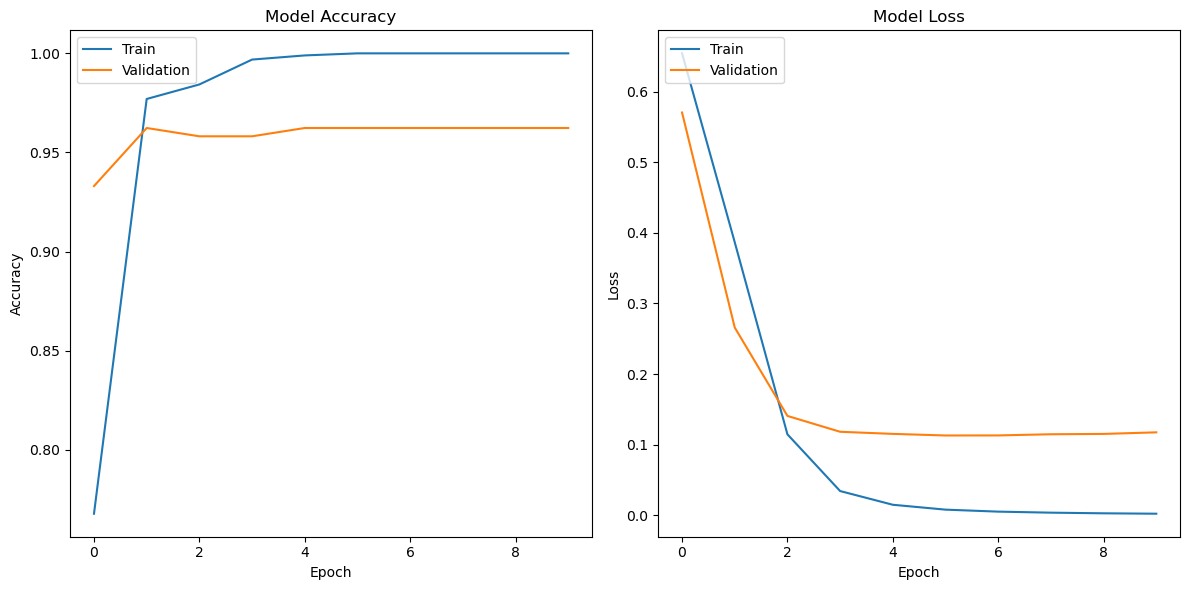

10/10 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9565
Test Accuracy: 0.95652174949646
Execution Time: 2.350957155227661


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import time

# Reading the data
df = pd.read_csv(r'C:\Users\Win10\Downloads\Kaggle Dataset\spam.csv', encoding='latin1')
print(df.head())

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

sns.countplot(x=df['label'])
plt.show()

# Find average number of tokens in all sentences
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length = len(s)
print(total_words_length)

# Splitting data for Training and testing
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})

# Performing undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(new_df['Text'].values.reshape(-1, 1), new_df['label'].values)

X_train, X_test, y_train_resampled, y_test = train_test_split(
    X_resampled.flatten(), y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, y_train_resampled.shape, X_test.shape, y_test.shape)

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec, y_train_resampled)

nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

# Building the model using TensorFlow


# Convert labels to categorical
y_train_resampled_cat = keras.utils.to_categorical(y_train_resampled)

# Measure time complexity
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert input data to dense arrays
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

# Train the model
history = model.fit(X_train_vec, y_train_resampled_cat, epochs=10, batch_size=32, validation_split=0.2)


# Plotting accuracy over time
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss over time
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluate the model on test data
y_test_cat = keras.utils.to_categorical(y_test)
accuracy = model.evaluate(X_test_vec, y_test_cat)[1]
print('Test Accuracy:', accuracy)

# Measure the end time complexity
end_time = time.time()
execution_time = end_time - start_time

# Print the execution time
print('Execution Time:', execution_time)